In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [355]:
from importlib import reload

import utils
utils = reload(utils)
utils.data = reload(utils.data)
utils.model = reload(utils.model)
utils.pipeline = reload(utils.pipeline)

from utils.data import load_data, get_all, build_ans, month_to_days
from utils.model import XGBModel
from utils.pipeline import pipeline, get_data

In [4]:
base, train, test, sample = load_data()

In [5]:
train = train.sample(frac=1.).reset_index(drop=True).sort_values('month', ignore_index=True)
data = get_data(train, base, test, 0.2, path='utils/')

In [7]:
data[0][0].to_csv('data/X_train.csv', index=False)
data[1][0].to_csv('data/X_val.csv', index=False)
data[2].to_csv('data/X_test.csv', index=False)

data[0][1].to_csv('data/y_train.csv', index=False)
data[1][1].to_csv('data/y_val.csv', index=False)

In [154]:
(X_train, y_train, reg_train), (X_val, y_val, reg_val), (X_test, reg_test) = get_all(data, start_date=
                                                                                    pd.Timestamp(year=2018, month=2,
                                                                                                day=2))

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


In [16]:
from utils.model import xgbmape
import xgboost

model = xgboost.XGBRegressor(n_estimators=200, max_depth=7)
model.fit(X_train.values, y_train.values, eval_set=[(X_train.values, y_train.values), 
                                                    (X_val.values, y_val.values)], eval_metric=xgbmape)

[10:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136449	validation_1-rmse:140998	validation_0-mape:89.6361	validation_1-mape:90.0426
[1]	validation_0-rmse:123315	validation_1-rmse:127989	validation_0-mape:80.3108	validation_1-mape:81.0804
[2]	validation_0-rmse:111463	validation_1-rmse:116273	validation_0-mape:71.9339	validation_1-mape:73.0268
[3]	validation_0-rmse:100814	validation_1-rmse:105746	validation_0-mape:64.4142	validation_1-mape:65.8033
[4]	validation_0-rmse:91268.7	validation_1-rmse:96301.1	validation_0-mape:57.685	validation_1-mape:59.343
[5]	validation_0-rmse:82691.1	validation_1-rmse:87813.9	validation_0-mape:51.6665	validation_1-mape:53.5711
[6]	validation_0-rmse:74978	validation_1-rmse:80185.4	validation_0-mape:46.302	validation_1-mape:48.4201
[7]	validation_0-rmse:68058	validation_1-rmse:73342	validation_0-mape:41.5299	validation_1-mape:43.8536
[8]	validation_0-rmse:6186

[75]	validation_0-rmse:12915.4	validation_1-rmse:18693.9	validation_0-mape:8.8767	validation_1-mape:11.7017
[76]	validation_0-rmse:12895.7	validation_1-rmse:18697.9	validation_0-mape:8.8629	validation_1-mape:11.7022
[77]	validation_0-rmse:12870.8	validation_1-rmse:18673.4	validation_0-mape:8.83201	validation_1-mape:11.6743
[78]	validation_0-rmse:12842.3	validation_1-rmse:18659.7	validation_0-mape:8.79456	validation_1-mape:11.6434
[79]	validation_0-rmse:12824.4	validation_1-rmse:18651.6	validation_0-mape:8.7742	validation_1-mape:11.6223
[80]	validation_0-rmse:12806.1	validation_1-rmse:18640.4	validation_0-mape:8.74983	validation_1-mape:11.6082
[81]	validation_0-rmse:12796.3	validation_1-rmse:18643.8	validation_0-mape:8.74223	validation_1-mape:11.6103
[82]	validation_0-rmse:12773	validation_1-rmse:18638.3	validation_0-mape:8.72458	validation_1-mape:11.6025
[83]	validation_0-rmse:12746.6	validation_1-rmse:18621.7	validation_0-mape:8.68399	validation_1-mape:11.5734
[84]	validation_0-rmse:1

[151]	validation_0-rmse:11661.8	validation_1-rmse:18413.5	validation_0-mape:7.51511	validation_1-mape:11.0209
[152]	validation_0-rmse:11651.6	validation_1-rmse:18409.7	validation_0-mape:7.49777	validation_1-mape:11.0144
[153]	validation_0-rmse:11645.6	validation_1-rmse:18405.4	validation_0-mape:7.48878	validation_1-mape:11.0101
[154]	validation_0-rmse:11630.2	validation_1-rmse:18401.1	validation_0-mape:7.46889	validation_1-mape:11.003
[155]	validation_0-rmse:11611.4	validation_1-rmse:18433.9	validation_0-mape:7.46526	validation_1-mape:11.0079
[156]	validation_0-rmse:11603.6	validation_1-rmse:18430.2	validation_0-mape:7.44166	validation_1-mape:10.9857
[157]	validation_0-rmse:11598.5	validation_1-rmse:18429.3	validation_0-mape:7.4331	validation_1-mape:10.9839
[158]	validation_0-rmse:11591.6	validation_1-rmse:18431.8	validation_0-mape:7.42208	validation_1-mape:10.977
[159]	validation_0-rmse:11589.7	validation_1-rmse:18430.1	validation_0-mape:7.41945	validation_1-mape:10.9759
[160]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [155]:
model_reg = xgboost.XGBRegressor(n_estimators=500, max_depth=7)

norm_train = y_train / reg_train
norm_val = y_val / reg_val

model_reg.fit(X_train.values, norm_train.values, eval_set=[(X_train.values, norm_train.values), 
                                                    (X_val.values, norm_val.values)], eval_metric=xgbmape)

[11:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:19.1913	validation_1-rmse:5.67341	validation_0-mape:47.8376	validation_1-mape:48.2421
[1]	validation_0-rmse:18.7522	validation_1-rmse:5.88403	validation_0-mape:44.8327	validation_1-mape:45.9731
[2]	validation_0-rmse:18.3626	validation_1-rmse:6.19053	validation_0-mape:42.2849	validation_1-mape:44.1194
[3]	validation_0-rmse:18.0176	validation_1-rmse:6.55876	validation_0-mape:40.0823	validation_1-mape:42.5459
[4]	validation_0-rmse:17.7174	validation_1-rmse:6.95509	validation_0-mape:38.1326	validation_1-mape:41.1195
[5]	validation_0-rmse:17.3092	validation_1-rmse:7.41745	validation_0-mape:36.3853	validation_1-mape:40.0244
[6]	validation_0-rmse:17.0678	validation_1-rmse:7.82581	validation_0-mape:34.9206	validation_1-mape:38.8857
[7]	validation_0-rmse:16.7271	validation_1-rmse:8.33295	validation_0-mape:33.6755	validation_1-mape:38.3146
[8]	valid

[75]	validation_0-rmse:13.8244	validation_1-rmse:17.0303	validation_0-mape:34.0329	validation_1-mape:49.8109
[76]	validation_0-rmse:13.8201	validation_1-rmse:17.0532	validation_0-mape:34.0725	validation_1-mape:49.8847
[77]	validation_0-rmse:13.819	validation_1-rmse:17.0572	validation_0-mape:34.0748	validation_1-mape:49.8822
[78]	validation_0-rmse:13.8128	validation_1-rmse:17.0735	validation_0-mape:34.1551	validation_1-mape:49.9922
[79]	validation_0-rmse:13.8073	validation_1-rmse:17.1326	validation_0-mape:34.1795	validation_1-mape:50.0481
[80]	validation_0-rmse:13.8066	validation_1-rmse:17.1352	validation_0-mape:34.2013	validation_1-mape:50.0895
[81]	validation_0-rmse:13.7857	validation_1-rmse:17.2665	validation_0-mape:34.2589	validation_1-mape:50.2337
[82]	validation_0-rmse:13.785	validation_1-rmse:17.2687	validation_0-mape:34.2744	validation_1-mape:50.2747
[83]	validation_0-rmse:13.784	validation_1-rmse:17.2752	validation_0-mape:34.31	validation_1-mape:50.3248
[84]	validation_0-rmse:1

[151]	validation_0-rmse:13.5383	validation_1-rmse:18.8738	validation_0-mape:34.8904	validation_1-mape:53.309
[152]	validation_0-rmse:13.5372	validation_1-rmse:18.8781	validation_0-mape:34.9067	validation_1-mape:53.3635
[153]	validation_0-rmse:13.5303	validation_1-rmse:18.948	validation_0-mape:34.9256	validation_1-mape:53.438
[154]	validation_0-rmse:13.529	validation_1-rmse:18.9522	validation_0-mape:34.9403	validation_1-mape:53.4808
[155]	validation_0-rmse:13.5285	validation_1-rmse:18.9543	validation_0-mape:34.9409	validation_1-mape:53.4808
[156]	validation_0-rmse:13.5278	validation_1-rmse:18.9551	validation_0-mape:34.9519	validation_1-mape:53.4935
[157]	validation_0-rmse:13.5274	validation_1-rmse:18.9573	validation_0-mape:34.9377	validation_1-mape:53.5664
[158]	validation_0-rmse:13.5265	validation_1-rmse:18.9589	validation_0-mape:34.9141	validation_1-mape:53.5653
[159]	validation_0-rmse:13.5258	validation_1-rmse:18.9598	validation_0-mape:34.9615	validation_1-mape:53.6059
[160]	validati

[226]	validation_0-rmse:13.4519	validation_1-rmse:19.5442	validation_0-mape:34.8559	validation_1-mape:55.0324
[227]	validation_0-rmse:13.4495	validation_1-rmse:19.5912	validation_0-mape:34.8522	validation_1-mape:55.0582
[228]	validation_0-rmse:13.447	validation_1-rmse:19.6359	validation_0-mape:34.8525	validation_1-mape:55.1233
[229]	validation_0-rmse:13.4468	validation_1-rmse:19.6359	validation_0-mape:34.844	validation_1-mape:55.1067
[230]	validation_0-rmse:13.4468	validation_1-rmse:19.6368	validation_0-mape:34.8436	validation_1-mape:55.1126
[231]	validation_0-rmse:13.4466	validation_1-rmse:19.6371	validation_0-mape:34.8626	validation_1-mape:55.1523
[232]	validation_0-rmse:13.4465	validation_1-rmse:19.6371	validation_0-mape:34.8418	validation_1-mape:55.1197
[233]	validation_0-rmse:13.4459	validation_1-rmse:19.6371	validation_0-mape:34.7959	validation_1-mape:55.0642
[234]	validation_0-rmse:13.4459	validation_1-rmse:19.6372	validation_0-mape:34.798	validation_1-mape:55.0731
[235]	validat

[301]	validation_0-rmse:13.4149	validation_1-rmse:20.0637	validation_0-mape:34.6974	validation_1-mape:56.2621
[302]	validation_0-rmse:13.4149	validation_1-rmse:20.0639	validation_0-mape:34.6947	validation_1-mape:56.2816
[303]	validation_0-rmse:13.4149	validation_1-rmse:20.0639	validation_0-mape:34.6923	validation_1-mape:56.279
[304]	validation_0-rmse:13.4147	validation_1-rmse:20.064	validation_0-mape:34.6857	validation_1-mape:56.2881
[305]	validation_0-rmse:13.4145	validation_1-rmse:20.0659	validation_0-mape:34.6892	validation_1-mape:56.3115
[306]	validation_0-rmse:13.4145	validation_1-rmse:20.0659	validation_0-mape:34.6862	validation_1-mape:56.3104
[307]	validation_0-rmse:13.4144	validation_1-rmse:20.066	validation_0-mape:34.6878	validation_1-mape:56.315
[308]	validation_0-rmse:13.4143	validation_1-rmse:20.066	validation_0-mape:34.6626	validation_1-mape:56.2693
[309]	validation_0-rmse:13.4139	validation_1-rmse:20.0669	validation_0-mape:34.6653	validation_1-mape:56.3082
[310]	validatio

[376]	validation_0-rmse:13.3939	validation_1-rmse:20.3914	validation_0-mape:34.4133	validation_1-mape:57.1923
[377]	validation_0-rmse:13.3937	validation_1-rmse:20.3915	validation_0-mape:34.4085	validation_1-mape:57.1968
[378]	validation_0-rmse:13.3936	validation_1-rmse:20.3922	validation_0-mape:34.4046	validation_1-mape:57.2022
[379]	validation_0-rmse:13.3932	validation_1-rmse:20.3929	validation_0-mape:34.4139	validation_1-mape:57.2668
[380]	validation_0-rmse:13.3929	validation_1-rmse:20.3929	validation_0-mape:34.4012	validation_1-mape:57.2528
[381]	validation_0-rmse:13.3927	validation_1-rmse:20.3939	validation_0-mape:34.404	validation_1-mape:57.2828
[382]	validation_0-rmse:13.3924	validation_1-rmse:20.4096	validation_0-mape:34.3978	validation_1-mape:57.293
[383]	validation_0-rmse:13.3923	validation_1-rmse:20.4127	validation_0-mape:34.3945	validation_1-mape:57.2944
[384]	validation_0-rmse:13.3922	validation_1-rmse:20.4127	validation_0-mape:34.3965	validation_1-mape:57.3076
[385]	valida

[451]	validation_0-rmse:13.3833	validation_1-rmse:20.5045	validation_0-mape:34.1287	validation_1-mape:57.8868
[452]	validation_0-rmse:13.3829	validation_1-rmse:20.506	validation_0-mape:34.1279	validation_1-mape:57.8924
[453]	validation_0-rmse:13.3828	validation_1-rmse:20.5065	validation_0-mape:34.1202	validation_1-mape:57.8966
[454]	validation_0-rmse:13.3827	validation_1-rmse:20.5079	validation_0-mape:34.1089	validation_1-mape:57.9003
[455]	validation_0-rmse:13.3826	validation_1-rmse:20.5082	validation_0-mape:34.102	validation_1-mape:57.8943
[456]	validation_0-rmse:13.3825	validation_1-rmse:20.5103	validation_0-mape:34.1037	validation_1-mape:57.9005
[457]	validation_0-rmse:13.3825	validation_1-rmse:20.5109	validation_0-mape:34.0981	validation_1-mape:57.8966
[458]	validation_0-rmse:13.3825	validation_1-rmse:20.5109	validation_0-mape:34.0958	validation_1-mape:57.9002
[459]	validation_0-rmse:13.3824	validation_1-rmse:20.5141	validation_0-mape:34.0915	validation_1-mape:57.9107
[460]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [135]:
from utils.pipeline import invmape

pred_train = model_reg.predict(X_train.values) * reg_train
pred_val = model_reg.predict(X_val.values) * reg_val


print(f'Train: {invmape(y_train, pred_train)}')
print(f'Val: {invmape(y_val, pred_val)}')

Train: 97.05082246917362
Val: 89.44309955807415


In [30]:
from utils.data import plot_model, plot_random_quadkey

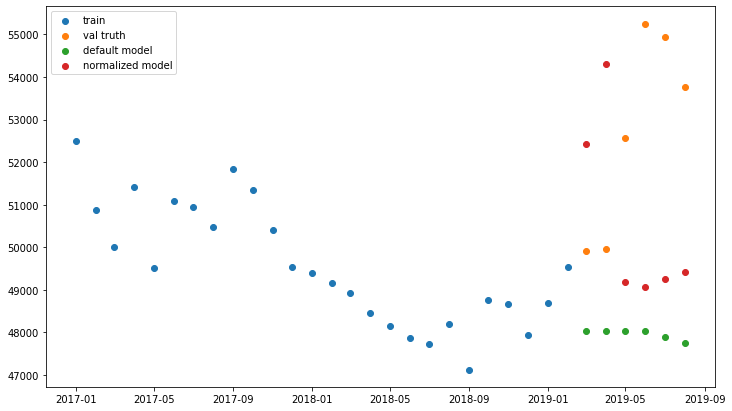

In [194]:
import random
plt.figure(figsize=(12, 7))

key = random.choice(train['city_quadkey'])
train_ind = data[0][0]['city_quadkey'] == key
val_ind = data[1][0]['city_quadkey'] == key
test_ind = data[2]['city_quadkey'] == key

plt.scatter(data[0][0][train_ind]['month'], y_train[train_ind], label='train')
plt.scatter(data[1][0][val_ind]['month'], y_val[val_ind], label='val truth')
plt.scatter(data[1][0][val_ind]['month'], model.predict(X_val[val_ind].values), label='default model')
plt.scatter(data[1][0][val_ind]['month'], 
            model_reg.predict(X_val[val_ind].values) * pred_val[val_ind], label='normalized model')
plt.legend()

## Stacking ##

In [199]:
ans1 = build_ans(data[0][0], data[0][1], 1)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp = train_x[['city_quadkey', 'month']]


In [227]:
ans2 = build_ans(data[0][0], data[0][1], 2)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

In [228]:
ans2

,bias,c1,c2,pearson,spearman,cnt_months
city_quadkey,,,,,,
1.203101e+14,81483.276210,-53.932285,0.072426,0.043297,0.136013,26
1.203101e+14,63619.677073,-20.803974,0.025753,-0.110543,0.348717,26
1.203101e+14,418081.994739,-113.167221,0.173116,0.293552,0.065814,26
1.203101e+14,80645.164062,0.000000,0.000000,NaN,NaN,17
1.203101e+14,58512.678997,-150.825576,0.183391,-0.615567,0.665205,8
...,...,...,...,...,...,...
1.203101e+14,205882.359375,0.000000,0.000000,-42.000000,-42.000000,1
1.201323e+14,54210.527344,0.000000,0.000000,-42.000000,-42.000000,1
1.203101e+14,123318.390625,0.000000,0.000000,-42.000000,-42.000000,1


In [229]:
dset = data[0][0][['city_quadkey', 'month']]
dset = dset.join(ans1, on='city_quadkey')
dset = dset.join(ans2, on='city_quadkey', lsuffix='_a1', rsuffix='_a2')
dset['days'] = dset['month'].apply(month_to_days)

In [230]:
dset['pred_1'] = dset['days'] * dset['c1_a1'] + dset['bias_a1']
dset['pred_2'] = dset['days'] * dset['c1_a2'] + dset['days'] * dset['days'] * dset['c2'] + dset['bias_a2']

In [232]:
dset.drop(['city_quadkey', 'month', 'cnt_months_a1', 'days'], axis=1, inplace=True)

In [233]:
dset

,bias_a1,c1_a1,bias_a2,c1_a2,c2,pearson,spearman,cnt_months_a2,pred_1,pred_2
0,74808.880489,1.084897,81483.276210,-53.932285,0.072426,0.043297,0.136013,26,74808.880489,81483.276210
1,61246.464610,-1.241534,63619.677073,-20.803974,0.025753,-0.110543,0.348717,26,61246.464610,63619.677073
2,402128.611309,18.336848,418081.994739,-113.167221,0.173116,0.293552,0.065814,26,402128.611309,418081.994739
3,80645.164062,0.000000,80645.164062,0.000000,0.000000,NaN,NaN,17,80645.164062,80645.164062
4,54075.517771,-24.772561,58512.678997,-150.825576,0.183391,-0.615567,0.665205,8,54075.517771,58512.678997
...,...,...,...,...,...,...,...,...,...,...
132816,128805.701974,15.186459,134990.452239,-35.794565,0.067113,0.716484,0.002705,26,140362.597623,146617.316203
132817,220338.847322,6.107376,225225.419770,-34.172741,0.053026,0.271600,0.202272,26,224986.560733,229928.415160
132818,54724.655905,-4.477570,50686.677355,28.807571,-0.043818,-0.303471,0.257601,26,51317.225278,47233.564924
132819,38522.620524,-8.250844,-57437.104890,273.792021,-0.206035,-0.414935,0.414430,6,32243.728470,31599.183928


In [234]:
def proc2(dX, ans1, ans2):
    dset = dX[['city_quadkey', 'month']]
    dset = dset.join(ans1, on='city_quadkey')
    dset = dset.join(ans2, on='city_quadkey', lsuffix='_a1', rsuffix='_a2')
    dset['days'] = dset['month'].apply(month_to_days)
    dset['pred_1'] = dset['days'] * dset['c1_a1'] + dset['bias_a1']
    dset['pred_2'] = dset['days'] * dset['c1_a2'] + dset['days'] * dset['days'] * dset['c2'] + dset['bias_a2']
    dset.drop(['city_quadkey', 'month', 'cnt_months_a1', 'days'], axis=1, inplace=True)
    return dset

In [238]:
def get_all(data):
    ans1 = build_ans(data[0][0], data[0][1], 1)
    ans2 = build_ans(data[0][0], data[0][1], 2)
    X_val = proc2(data[1][0], ans1, ans2)
    X_test = proc2(data[2], ans1, ans2)
    return X_val, X_test

In [239]:
meta_val, meta_test = get_all(data)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

In [242]:
X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).values, data[0][1].values
X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).values, data[1][1].values
X_test = data[2].drop(['month', 'city_quadkey'], axis=1).values

In [243]:
model = xgboost.XGBRegressor(n_estimators=300, max_depth=7)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                                                    (X_val, y_val)], eval_metric=xgbmape)

[12:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136449	validation_1-rmse:140998	validation_0-mape:89.6361	validation_1-mape:90.0426
[1]	validation_0-rmse:123315	validation_1-rmse:127989	validation_0-mape:80.3108	validation_1-mape:81.0804
[2]	validation_0-rmse:111463	validation_1-rmse:116273	validation_0-mape:71.9339	validation_1-mape:73.0268
[3]	validation_0-rmse:100814	validation_1-rmse:105746	validation_0-mape:64.4142	validation_1-mape:65.8033
[4]	validation_0-rmse:91268.7	validation_1-rmse:96301.1	validation_0-mape:57.685	validation_1-mape:59.343
[5]	validation_0-rmse:82691.1	validation_1-rmse:87813.9	validation_0-mape:51.6665	validation_1-mape:53.5711
[6]	validation_0-rmse:74978	validation_1-rmse:80185.4	validation_0-mape:46.302	validation_1-mape:48.4201
[7]	validation_0-rmse:68058	validation_1-rmse:73342	validation_0-mape:41.5299	validation_1-mape:43.8536
[8]	validation_0-rmse:6186

[75]	validation_0-rmse:12915.4	validation_1-rmse:18693.9	validation_0-mape:8.8767	validation_1-mape:11.7017
[76]	validation_0-rmse:12895.7	validation_1-rmse:18697.9	validation_0-mape:8.8629	validation_1-mape:11.7022
[77]	validation_0-rmse:12870.8	validation_1-rmse:18673.4	validation_0-mape:8.83201	validation_1-mape:11.6743
[78]	validation_0-rmse:12842.3	validation_1-rmse:18659.7	validation_0-mape:8.79456	validation_1-mape:11.6434
[79]	validation_0-rmse:12824.4	validation_1-rmse:18651.6	validation_0-mape:8.7742	validation_1-mape:11.6223
[80]	validation_0-rmse:12806.1	validation_1-rmse:18640.4	validation_0-mape:8.74983	validation_1-mape:11.6082
[81]	validation_0-rmse:12796.3	validation_1-rmse:18643.8	validation_0-mape:8.74223	validation_1-mape:11.6103
[82]	validation_0-rmse:12773	validation_1-rmse:18638.3	validation_0-mape:8.72458	validation_1-mape:11.6025
[83]	validation_0-rmse:12746.6	validation_1-rmse:18621.7	validation_0-mape:8.68399	validation_1-mape:11.5734
[84]	validation_0-rmse:1

[151]	validation_0-rmse:11661.8	validation_1-rmse:18413.5	validation_0-mape:7.51511	validation_1-mape:11.0209
[152]	validation_0-rmse:11651.6	validation_1-rmse:18409.7	validation_0-mape:7.49777	validation_1-mape:11.0144
[153]	validation_0-rmse:11645.6	validation_1-rmse:18405.4	validation_0-mape:7.48878	validation_1-mape:11.0101
[154]	validation_0-rmse:11630.2	validation_1-rmse:18401.1	validation_0-mape:7.46889	validation_1-mape:11.003
[155]	validation_0-rmse:11611.4	validation_1-rmse:18433.9	validation_0-mape:7.46526	validation_1-mape:11.0079
[156]	validation_0-rmse:11603.6	validation_1-rmse:18430.2	validation_0-mape:7.44166	validation_1-mape:10.9857
[157]	validation_0-rmse:11598.5	validation_1-rmse:18429.3	validation_0-mape:7.4331	validation_1-mape:10.9839
[158]	validation_0-rmse:11591.6	validation_1-rmse:18431.8	validation_0-mape:7.42208	validation_1-mape:10.977
[159]	validation_0-rmse:11589.7	validation_1-rmse:18430.1	validation_0-mape:7.41945	validation_1-mape:10.9759
[160]	validat

[226]	validation_0-rmse:11011.7	validation_1-rmse:18366.7	validation_0-mape:6.60865	validation_1-mape:10.6083
[227]	validation_0-rmse:11007.8	validation_1-rmse:18363.9	validation_0-mape:6.60424	validation_1-mape:10.6074
[228]	validation_0-rmse:11003.1	validation_1-rmse:18360.8	validation_0-mape:6.59493	validation_1-mape:10.602
[229]	validation_0-rmse:10997.4	validation_1-rmse:18359	validation_0-mape:6.58575	validation_1-mape:10.5987
[230]	validation_0-rmse:10995.5	validation_1-rmse:18358.7	validation_0-mape:6.58217	validation_1-mape:10.5978
[231]	validation_0-rmse:10986.8	validation_1-rmse:18355.4	validation_0-mape:6.56397	validation_1-mape:10.5888
[232]	validation_0-rmse:10978.4	validation_1-rmse:18352.5	validation_0-mape:6.5578	validation_1-mape:10.5862
[233]	validation_0-rmse:10965.8	validation_1-rmse:18347.3	validation_0-mape:6.53746	validation_1-mape:10.5729
[234]	validation_0-rmse:10957.2	validation_1-rmse:18350.3	validation_0-mape:6.53335	validation_1-mape:10.5715
[235]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [297]:
meta_val['xgboost'] = model.predict(X_val)
meta_test['xgboost'] = model.predict(X_test)

from sklearn.model_selection import train_test_split
X_tune, X_ctrl, y_tune, y_ctrl = train_test_split(meta_val, y_val, test_size=0.4, shuffle=False)

In [298]:
model2 = xgboost.XGBRegressor(n_estimators=300, max_depth=5)
model2.fit(X_tune.values, y_tune, eval_set=[(X_tune.values, y_tune), 
                                                    (X_ctrl.values, y_ctrl)], eval_metric=xgbmape)

[12:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139048	validation_1-rmse:141925	validation_0-mape:89.8228	validation_1-mape:89.8498
[1]	validation_0-rmse:125400	validation_1-rmse:128023	validation_0-mape:80.6585	validation_1-mape:80.6888
[2]	validation_0-rmse:113112	validation_1-rmse:115525	validation_0-mape:72.4056	validation_1-mape:72.438
[3]	validation_0-rmse:102048	validation_1-rmse:104301	validation_0-mape:65.0178	validation_1-mape:65.0781
[4]	validation_0-rmse:92092.5	validation_1-rmse:94180.5	validation_0-mape:58.3938	validation_1-mape:58.4592
[5]	validation_0-rmse:83139.1	validation_1-rmse:85098.3	validation_0-mape:52.4522	validation_1-mape:52.5228
[6]	validation_0-rmse:75079.9	validation_1-rmse:76912.1	validation_0-mape:47.1272	validation_1-mape:47.1779
[7]	validation_0-rmse:67829.5	validation_1-rmse:69551.6	validation_0-mape:42.3559	validation_1-mape:42.4201
[8]	validation_0-r

[75]	validation_0-rmse:7763.39	validation_1-rmse:13171.2	validation_0-mape:5.28964	validation_1-mape:6.8198
[76]	validation_0-rmse:7754.5	validation_1-rmse:13167.7	validation_0-mape:5.28401	validation_1-mape:6.8152
[77]	validation_0-rmse:7733.68	validation_1-rmse:13163.3	validation_0-mape:5.27339	validation_1-mape:6.80874
[78]	validation_0-rmse:7713.57	validation_1-rmse:13154.5	validation_0-mape:5.26456	validation_1-mape:6.80544
[79]	validation_0-rmse:7708.37	validation_1-rmse:13154.2	validation_0-mape:5.26104	validation_1-mape:6.80252
[80]	validation_0-rmse:7691.12	validation_1-rmse:13146.8	validation_0-mape:5.25077	validation_1-mape:6.79714
[81]	validation_0-rmse:7684.4	validation_1-rmse:13144.9	validation_0-mape:5.24757	validation_1-mape:6.79525
[82]	validation_0-rmse:7673.12	validation_1-rmse:13139.5	validation_0-mape:5.24275	validation_1-mape:6.79341
[83]	validation_0-rmse:7666.37	validation_1-rmse:13134.3	validation_0-mape:5.23139	validation_1-mape:6.78407
[84]	validation_0-rmse:

[151]	validation_0-rmse:7108.72	validation_1-rmse:12883.6	validation_0-mape:4.92239	validation_1-mape:6.6005
[152]	validation_0-rmse:7093.84	validation_1-rmse:12877.5	validation_0-mape:4.91754	validation_1-mape:6.59771
[153]	validation_0-rmse:7083.14	validation_1-rmse:12873.1	validation_0-mape:4.90649	validation_1-mape:6.59531
[154]	validation_0-rmse:7071.47	validation_1-rmse:12864	validation_0-mape:4.90223	validation_1-mape:6.59189
[155]	validation_0-rmse:7066.54	validation_1-rmse:12862.4	validation_0-mape:4.89757	validation_1-mape:6.58918
[156]	validation_0-rmse:7056.89	validation_1-rmse:12854.1	validation_0-mape:4.89433	validation_1-mape:6.58559
[157]	validation_0-rmse:7048.35	validation_1-rmse:12847.2	validation_0-mape:4.88964	validation_1-mape:6.58155
[158]	validation_0-rmse:7044.96	validation_1-rmse:12847.1	validation_0-mape:4.88457	validation_1-mape:6.57772
[159]	validation_0-rmse:7042.11	validation_1-rmse:12846.4	validation_0-mape:4.88427	validation_1-mape:6.57762
[160]	validat

[226]	validation_0-rmse:6587.52	validation_1-rmse:12637.5	validation_0-mape:4.6027	validation_1-mape:6.40342
[227]	validation_0-rmse:6579.26	validation_1-rmse:12636	validation_0-mape:4.59396	validation_1-mape:6.39917
[228]	validation_0-rmse:6577.59	validation_1-rmse:12634.8	validation_0-mape:4.59176	validation_1-mape:6.398
[229]	validation_0-rmse:6572.64	validation_1-rmse:12632.5	validation_0-mape:4.58472	validation_1-mape:6.39343
[230]	validation_0-rmse:6570.29	validation_1-rmse:12631.1	validation_0-mape:4.58204	validation_1-mape:6.39244
[231]	validation_0-rmse:6562.93	validation_1-rmse:12627.8	validation_0-mape:4.57909	validation_1-mape:6.39127
[232]	validation_0-rmse:6554.34	validation_1-rmse:12625.7	validation_0-mape:4.57501	validation_1-mape:6.38886
[233]	validation_0-rmse:6549.06	validation_1-rmse:12623	validation_0-mape:4.57053	validation_1-mape:6.38606
[234]	validation_0-rmse:6539.9	validation_1-rmse:12616.3	validation_0-mape:4.56259	validation_1-mape:6.37942
[235]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [262]:
X_tune

,bias_a1,c1_a1,bias_a2,c1_a2,c2,pearson,spearman,cnt_months_a2,pred_1,pred_2,xgboost
132821,146343.854176,16.340255,152660.521165,-38.025519,0.074586,0.727886,3.846200e-04,25.0,158778.788544,166917.318060,152227.109375
132822,79560.198108,7.683061,79760.550221,5.958687,0.002366,0.677910,1.149110e-04,25.0,85407.007613,85665.145582,80983.968750
132823,45152.602621,-7.038817,45730.143958,-12.009553,0.006819,-0.861501,2.116511e-08,25.0,39796.062639,40540.179311,44690.574219
132824,79614.308678,9.033285,77469.257480,27.495136,-0.025328,0.637117,1.521657e-03,25.0,86488.638350,83724.908282,82842.156250
132825,78998.382054,0.144912,78862.519641,1.314241,-0.001604,0.033701,5.149309e-01,25.0,79108.659783,78933.611731,75244.968750
...,...,...,...,...,...,...,...,...,...,...,...
165689,61227.601858,-9.623269,63606.176386,-29.229908,0.025811,-0.833291,5.598066e-06,26.0,52162.482930,58975.155087,54635.582031
165690,139529.583536,51.342133,152082.338665,-52.130488,0.136214,0.858448,1.467695e-11,26.0,187893.872526,223847.257352,157660.781250
165691,180071.725482,6.638860,165448.130819,125.076144,-0.155186,0.082795,8.275722e-01,24.0,186325.531920,145563.795425,186987.656250
165692,32450.970727,26.826233,45191.897383,-78.880129,0.158498,0.687314,3.161593e-01,10.0,57721.282382,111532.335000,37168.203125


In [257]:
sample['avg_price_sqm'] = model2.predict(meta_test.values)

In [259]:
sample.to_csv('time.tsv', sep='\t', index=False)

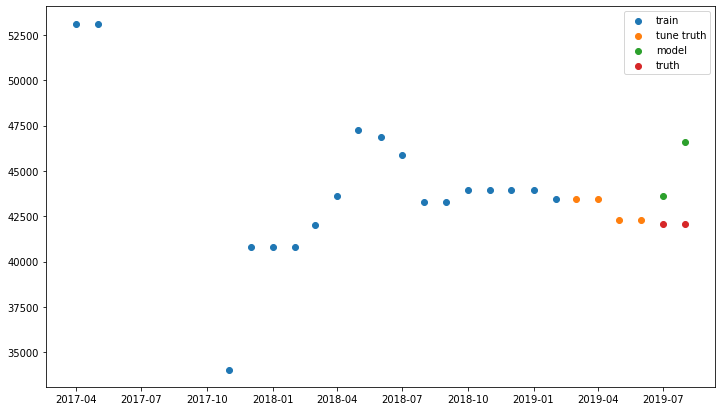

In [353]:
import random
plt.figure(figsize=(12, 7))

key = random.choice(list(data[1][0]['city_quadkey']))
train_ind = data[0][0]['city_quadkey'] == key
tune_ind = data[1][0].loc[X_tune.index]['city_quadkey'] == key
val_ind = data[1][0].loc[X_ctrl.index]['city_quadkey'] == key
test_ind = data[2]['city_quadkey'] == key

plt.scatter(data[0][0][train_ind]['month'], y_train[train_ind], label='train')
plt.scatter(data[1][0].loc[X_tune.index][tune_ind]['month'], data[1][1].loc[X_tune.index][tune_ind], label='tune truth')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], model2.predict(X_ctrl[val_ind].values), label='model')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], 
            data[1][1].loc[X_ctrl.index][val_ind], label='truth')
plt.legend()

In [ ]:
def first_model_xgb(data):
    X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).values, data[0][1].values
    X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).values, data[1][1].values
    X_test = data[2].drop(['month', 'city_quadkey'], axis=1).values

    model = xgboost.XGBRegressor(n_estimators=300, max_depth=7)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                                                    (X_val, y_val)], eval_metric=xgbmape)
    